In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
X,y = make_regression(n_samples=100, n_features=100, n_informative=10)
X.shape

(100, 100)

In [3]:
y

array([ 116.57705658,   96.5918327 ,   43.99094712,  -29.89141962,
        -55.53856298,  -99.40671214,  180.54943188,   35.72539038,
        -66.41170854,  -22.62593032, -131.76461227,   68.941584  ,
       -290.3226581 ,   10.47736488,  137.04290589,  -56.08008421,
       -243.0812821 , -201.09291882, -269.05695626,   34.61943315,
         41.88222732,  251.03152993, -127.83697237,  -12.37078414,
         15.75477957,   54.73085922,  246.4290486 ,  266.36139502,
        295.92310289,  -36.0321127 ,  212.98007331,  -82.3635413 ,
        -68.4421269 ,  -74.1050889 , -245.54032408,   97.69526311,
        104.32489121,  -35.85711473,  213.63966975, -287.38180393,
       -178.71463772,  123.9429351 , -157.29939538,  412.69748554,
         -7.80632991, -381.59085577,  -45.06504038,  -86.02405715,
       -201.50160904, -493.40540615,  -17.76722356, -283.44072761,
         18.4631429 ,  145.05718448,  518.92013382,  -16.85387597,
         91.10984711,  125.86761228,  -27.84928018, -307.60479

In [4]:
#generate feature selection
fs = SelectKBest(f_regression, k=10)

In [5]:
#apply feature selection
X_selected = fs.fit_transform(X, y)
X_selected.shape

(100, 10)

In [6]:
fs

,score_func,<function f_r...001AD6B1F4E00>
,k,10


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('agriculture_data.csv')
df

,Temperature,Rainfall,Soil_pH,Fertilizer,Crop_Yield,Longitude,Latitude
0,31.854792,186.028961,5.056750,70.475781,79.790392,34.687270,0.118858
1,22.176509,181.342533,6.283099,76.570462,75.164922,34.975357,0.481846
2,26.815642,119.903741,6.576815,127.934068,63.526704,34.865997,0.288614
3,28.164313,205.454457,6.046929,171.668118,94.829763,34.799329,0.405142
4,27.021342,129.996798,7.198165,67.304302,60.533301,34.578009,0.644540
...,...,...,...,...,...,...,...
95,20.696037,182.573246,5.458220,122.936325,79.601782,34.746898,0.309526
96,19.341307,162.113247,6.897904,130.815800,73.207801,34.761366,0.535573
97,17.703930,167.594626,5.762858,101.155986,70.639539,34.713771,0.638266
98,25.399913,204.456853,5.414196,57.802341,80.644478,34.512710,0.632252


In [9]:
X = df.drop('Crop_Yield', axis=1)
y = df['Crop_Yield']
y

0     79.790392
1     75.164922
2     63.526704
3     94.829763
4     60.533301
        ...    
95    79.601782
96    73.207801
97    70.639539
98    80.644478
99    74.120688
Name: Crop_Yield, Length: 100, dtype: float64

In [10]:
# fs = SelectKBest(f_regression, k=2)
# X_selected = fs.fit_transform(X, y)
# X_selected

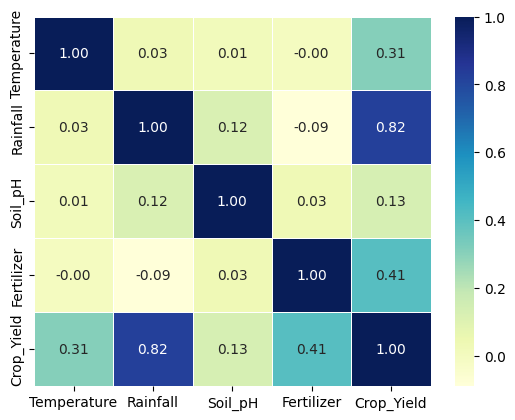

In [11]:
import seaborn as sns
df_data = df[['Temperature', 'Rainfall', 'Soil_pH', 'Fertilizer', 'Crop_Yield']]
df_copy = df_data.corr()
ax = sns.heatmap(df_copy,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [12]:
df.dtypes

Temperature    float64
Rainfall       float64
Soil_pH        float64
Fertilizer     float64
Crop_Yield     float64
Longitude      float64
Latitude       float64
dtype: object

,Temperature,Rainfall,Soil_pH,Fertilizer,Crop_Yield,Longitude,Latitude
0,3.461188,5.225902,1.620724,4.255269,4.379403,34.687270,0.118858
1,3.099034,5.200388,1.837863,4.338211,4.319685,34.975357,0.481846
2,3.288985,4.786689,1.883551,4.851515,4.151460,34.865997,0.288614
3,3.338056,5.325224,1.799551,5.145563,4.552083,34.799329,0.405142
4,3.296627,4.867510,1.973826,4.209224,4.103194,34.578009,0.644540
...,...,...,...,...,...,...,...
95,3.029942,5.207151,1.697123,4.811667,4.377036,34.746898,0.309526
96,2.962243,5.088295,1.931218,4.873790,4.293302,34.761366,0.535573
97,2.873787,5.121548,1.751434,4.616664,4.257590,34.713771,0.638266
98,3.234746,5.320357,1.689024,4.057029,4.390050,34.512710,0.632252


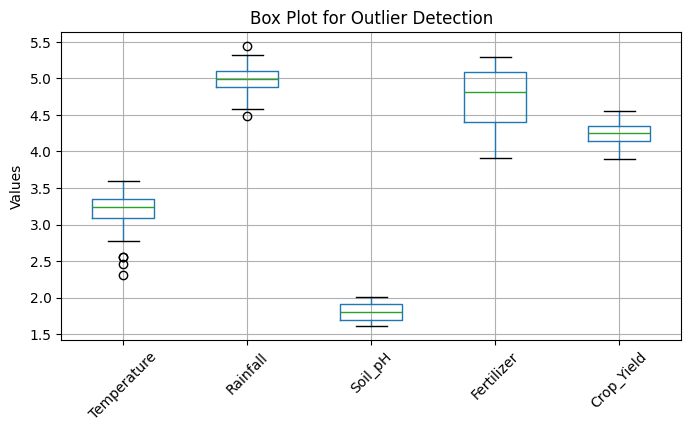

In [13]:
#handling missing values

#detect outliers
features = ['Temperature', 'Rainfall', 'Soil_pH', 'Fertilizer', 'Crop_Yield']

#plot box plots
df[features] = np.log(df[features])
df[features].boxplot(figsize=(8, 4))

plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)

# code to replace null values with median values
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    median = df[col].median()
    df[col] = df[col].fillna(median) # Replace nulls with median

df

In [14]:
df[features]

,Temperature,Rainfall,Soil_pH,Fertilizer,Crop_Yield
0,3.461188,5.225902,1.620724,4.255269,4.379403
1,3.099034,5.200388,1.837863,4.338211,4.319685
2,3.288985,4.786689,1.883551,4.851515,4.151460
3,3.338056,5.325224,1.799551,5.145563,4.552083
4,3.296627,4.867510,1.973826,4.209224,4.103194
...,...,...,...,...,...
95,3.029942,5.207151,1.697123,4.811667,4.377036
96,2.962243,5.088295,1.931218,4.873790,4.293302
97,2.873787,5.121548,1.751434,4.616664,4.257590
98,3.234746,5.320357,1.689024,4.057029,4.390050


## Feature Transformation

In [15]:
# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include='number').columns

# Remove columns that contain zeros from considerations
numerical_cols = numerical_cols.difference(numerical_0s)

# Calculate the skewness for the remaining columns
skewness = df[numerical_cols].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# list of skewed features/cols
skewed_features = ['Temperature']

# Apply log transformation to each skewed feature -> convert this skewed features into Gaussian Distribution
for col in skewed_features:
    df[col] = np.log(df[col])

skewness

Temperature   -1.299156
Rainfall      -0.196225
Soil_pH        0.057724
Fertilizer    -0.345969
Crop_Yield    -0.260783
Longitude      0.113381
Latitude       0.064276
dtype: float64

In [16]:
temp_data = df['Temperature']
temp_mean = temp_data.mean()
temp_median = temp_data.median()
temp_mode = temp_data.mode()
temp_std = temp_data.std()

skew = 3 * ((temp_mean - temp_median)) / temp_std
print(f"The pearson's second skewness coefficient distribution is {skew}")
print(f"Mean: {temp_mean}")
print(f"Median: {temp_median}")
print(f"Mode: {temp_mode}")

The pearson's second skewness coefficient distribution is -0.5435049046947441
Mean: 1.1605049896423205
Median: 1.1745468198120121
Mode: 0     0.835529
1     0.900609
2     0.935804
3     0.939800
4     1.021880
        ...   
95    1.247949
96    1.250710
97    1.264201
98    1.269192
99    1.279678
Name: Temperature, Length: 100, dtype: float64


In [17]:
mean = np.mean([1, 2, 3])
mean

np.float64(2.0)

## Kurtosis

In [18]:
agric_data = pd.read_csv('agriculture_data.csv')
print(f"Kurtosis for agric dataset: {agric_data.select_dtypes(include='number').kurtosis()}")
print("-----------------------------------")
print(f"Kurtosis for Numerical cols: {df[numerical_cols].kurtosis()}")

Kurtosis for agric dataset: Temperature    0.282531
Rainfall       0.096283
Soil_pH       -1.163710
Fertilizer    -1.258069
Crop_Yield    -0.444827
Longitude     -1.282619
Latitude      -1.304057
dtype: float64
-----------------------------------
Kurtosis for Numerical cols: Temperature    3.844421
Rainfall      -0.141163
Soil_pH       -1.197336
Fertilizer    -1.041620
Crop_Yield    -0.320341
Longitude     -1.282619
Latitude      -1.304057
dtype: float64


## Visualizing Skewness and Kurtosis

Mode: 0     10.034550
1     11.717723
2     12.797665
3     12.928962
4     16.093458
        ...    
95    32.563535
96    32.878638
97    34.475967
98    35.092119
99    36.433227
Name: Temperature, Length: 100, dtype: float64
--------------------------


,Temperature,Rainfall,Soil_pH,Fertilizer,Crop_Yield,Longitude,Latitude
0,10.034550,89.259665,5.003585,50.060756,49.377625,34.502761,0.104171
1,11.717723,97.648324,5.041120,50.520156,49.930350,34.510292,0.109953
2,12.797665,100.167028,5.056750,52.593774,50.694244,34.512710,0.118858
3,12.928962,102.162355,5.082023,54.010321,52.660565,34.517194,0.122132
4,16.093458,103.453655,5.121603,54.806724,54.878855,34.522614,0.124465
...,...,...,...,...,...,...,...
95,32.563535,193.195672,7.325334,194.201536,85.723783,34.975357,0.662038
96,32.878638,200.683768,7.379309,197.977788,86.240760,34.982816,0.665746
97,34.475967,204.456853,7.447934,198.956792,86.499680,34.984792,0.677468
98,35.092119,205.454457,7.449540,198.967977,89.239297,34.984955,0.683069


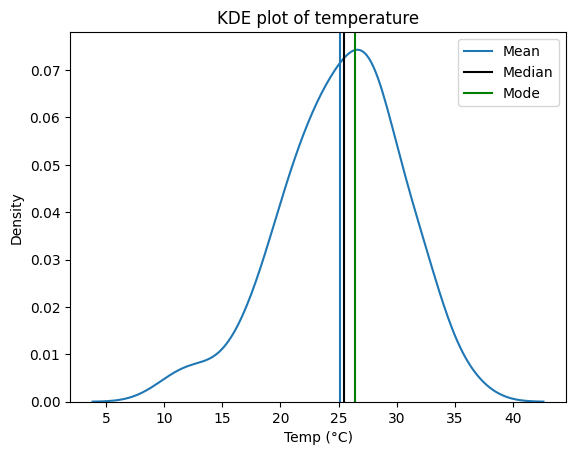

In [19]:
temperatures = agric_data['Temperature']
sns.kdeplot(temperatures)

plt.title("KDE plot of temperature")
plt.xlabel("Temp (°C)")

#Add vertical lines at the position of mean, median, and mode
plt.axvline(temperatures.mean(), label="Mean")
plt.axvline(temperatures.median(), color="black", label="Median")
plt.axvline(temperatures.mode()[55], color="green", label="Mode")
plt.legend()

print(f"Mode: {temperatures.mode()}")
print("--------------------------")
agric_data.mode().squeeze()

Text(0.5, 1.0, 'A Histogram of Temperature')

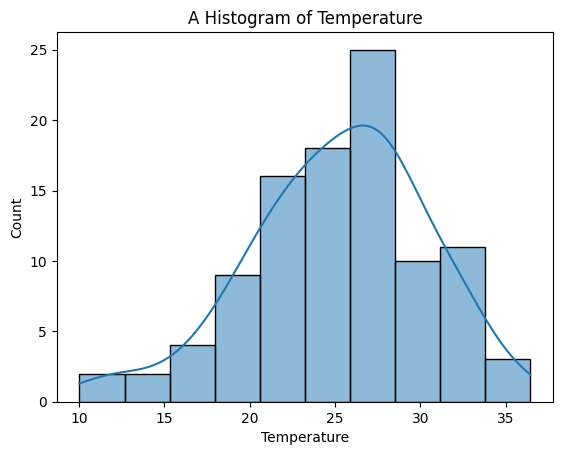

In [20]:
sns.histplot(agric_data['Temperature'], kde=True)
plt.title("A Histogram of Temperature")

In [21]:
#skewness fxn

def skew_fxn(data):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data)
    first_part = n / ((n-1) * (n-2))
    second_part = sum(((data - mean) / std) ** 3)
    # print(f"second_part: {second_part}")
    skewness = first_part * second_part
    return skewness

skew_fxn(agric_data["Temperature"])

-0.490736894826906

In [22]:
# kurtosis fxn
def kurtosis_fxn(data):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data)
    kurt = 1 / n * sum(((data - mean) / std) ** 4) - 3
    return kurt

kurtosis_fxn(agric_data["Temperature"])

0.20919516575477637

## Dimensionality reduction
- It is a process of transforming high dimensional data into a lower dimensional space while retaining important information as possible

## How to avoid Data Leakage

In [54]:
# Leakage
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=500, n_informative=5, n_features=10, n_classes=2, random_state=7)
print(X.shape)
print(y.shape)
#normalize
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#define the model
model = LogisticRegression()

#fit
model.fit(X_train, y_train)

#evaluate the model
y_pred = model.predict(X_test)

#evaluate predictions
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"The accuracy is: {accuracy:.2f}%")

(500, 10)
(500,)
The accuracy is: 69.70%


In [62]:
# without data leakage
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=500, n_informative=5, n_features=10, n_classes=2, random_state=7)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

#normalize
sc = MinMaxScaler()

#fit on the training dataset
sc.fit(X_train)

#scale the training dataset
X_train = sc.transform(X_train)

#scale the test dataset
X_test = sc.transform(X_test)

#define the model
model = LogisticRegression()
model.fit(X_train, y_train)

#evaluate the model
y_pred = model.predict(X_test)

#evaluate predictions
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"The accuracy is: {accuracy:.2f}%")

The accuracy is: 70.30%
